In [1]:
import pandas as pd
import numpy as np
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Importando DataSet

In [2]:
dataset = pd.read_csv('Employee_Compensation_SF.csv', sep=',')
# dataset = dataset.sample(100000)
dataset.head()

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,Fiscal,2016,1,Public Protection,DAT,District Attorney,311.0,Municipal Attorneys' Association,8100,Legal & Court,...,49919,114473.16,0.0,1500.00,115973.16,21025.98,13068.80,9368.71,43463.49,159436.65
1,Calendar,2013,5,Culture & Recreation,ART,Arts Commission,790.0,"SEIU - Miscellaneous, Local 1021",1800,"Budget, Admn & Stats Analysis",...,1225,84077.11,0.0,0.00,84077.11,16587.30,12457.73,6931.91,35976.94,120054.05
2,Calendar,2015,4,Community Health,DPH,Public Health,535.0,"SEIU - Human Services, Local 1021",2900,Human Services,...,34873,9980.17,0.0,798.43,10778.60,0.00,2254.93,835.11,3090.04,13868.64
3,Fiscal,2015,4,Community Health,DPH,Public Health,250.0,"SEIU - Health Workers, Local 1021",2200,Medical & Dental,...,51145,2873.41,0.0,0.00,2873.41,0.00,622.63,222.46,845.09,3718.50
4,Fiscal,2014,5,Culture & Recreation,REC,Recreation and Park Commission,790.0,"SEIU - Miscellaneous, Local 1021",3200,Recreation,...,48705,6701.85,0.0,176.70,6878.55,0.00,2711.66,538.43,3250.09,10128.64


# Exploring Data

# Gráfico da distribuição do Salários e Benefícios na Cidade

/home/marco/Documents/ml/ml_env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


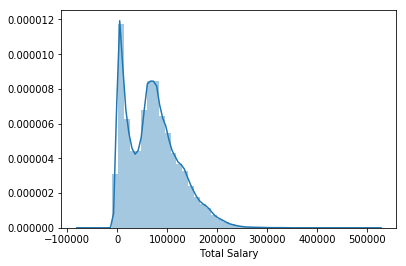

In [3]:
sns.distplot(dataset['Total Salary'])

/home/marco/Documents/ml/ml_env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


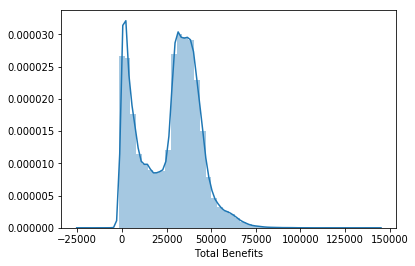

In [9]:
sns.distplot(dataset['Total Benefits'])

/home/marco/Documents/ml/ml_env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


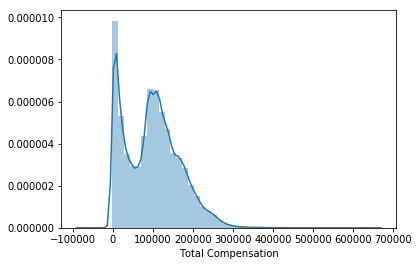

In [10]:
sns.distplot(dataset['Total Compensation'])

/home/marco/Documents/ml/ml_env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


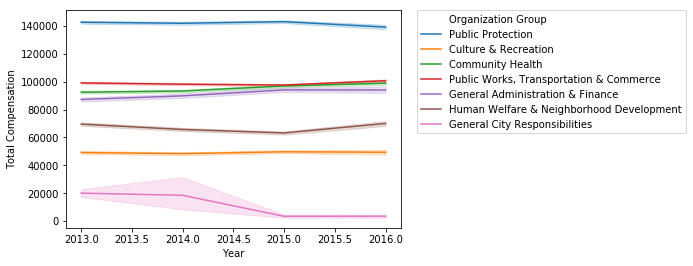

In [13]:
_ = sns.lineplot(x='Year',y='Total Compensation',hue='Organization Group',data=dataset)
_.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/home/marco/Documents/ml/ml_env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


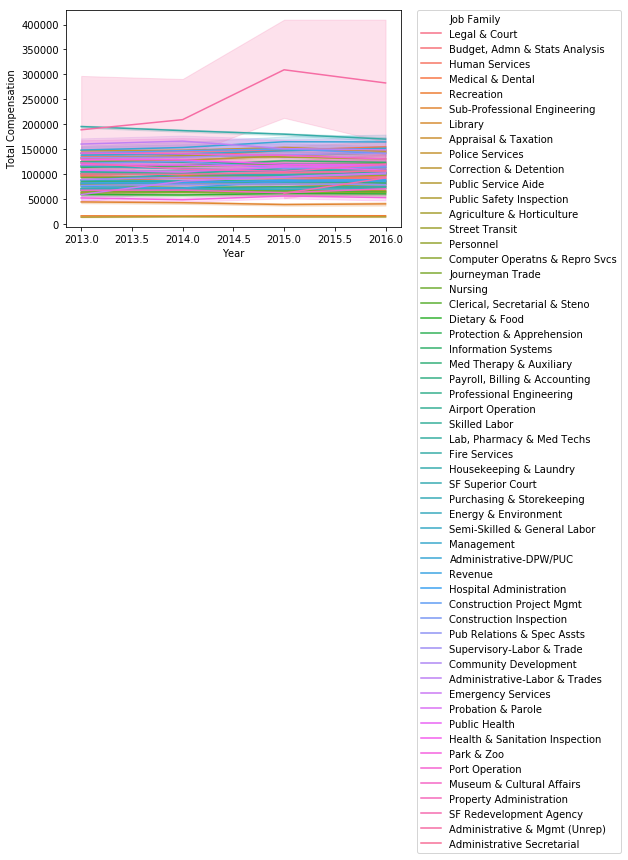

In [14]:
_ = sns.lineplot(x='Year',y='Total Compensation',hue='Job Family',data=dataset)
_.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

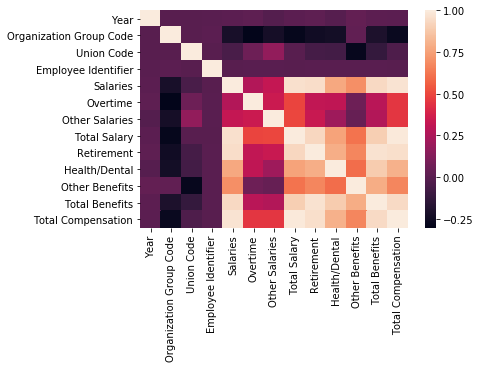

In [15]:
sns.heatmap(dataset.corr())

In [16]:
year_compensation = dataset.groupby(['Year']).mean().reset_index()[['Year','Total Compensation']]
year_compensation

,Year,Total Compensation
0,2013,97872.718129
1,2014,97087.853954
2,2015,97807.731425
3,2016,99658.289452


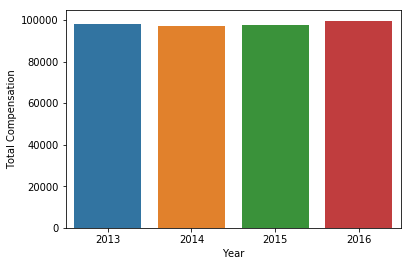

In [17]:
sns.barplot(x='Year', y='Total Compensation', data=year_compensation)

In [18]:
salary_year_organization = dataset.groupby(['Year','Organization Group']).mean().reset_index()[['Year','Organization Group','Total Compensation']]

# Settando Legenda para fora do Plot


Para nunca mais perder: 

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot/34579525


https://matplotlib.org/users/legend_guide.html

# Total Compensation ao longo do Tempo

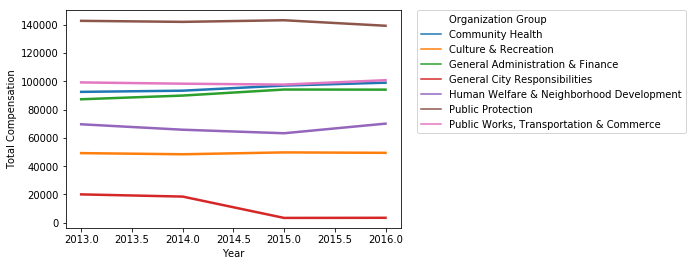

In [19]:
g = sns.lineplot(
    data=salary_year_organization,
    x='Year',
    y='Total Compensation',
    hue='Organization Group', 
    markers=True,
    linewidth=2.5)

g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Total Benefits ao longo do tempo

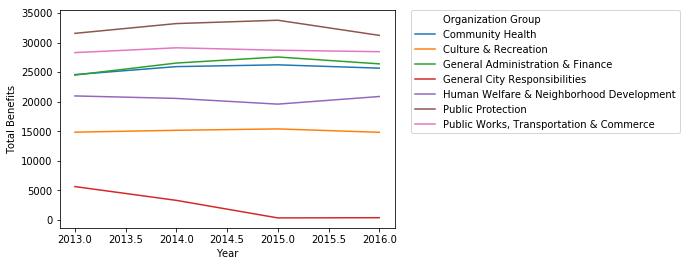

In [20]:
benefits_salary = dataset.groupby(['Year','Organization Group']).mean().reset_index()[['Year','Organization Group','Total Salary','Total Benefits']]

g = sns.lineplot(x='Year',y='Total Benefits', hue='Organization Group', data=benefits_salary)
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/home/marco/Documents/ml/ml_env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


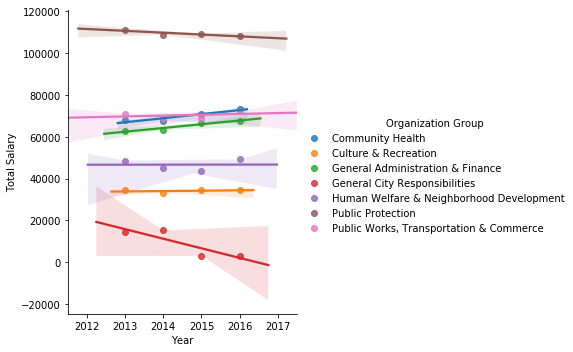

In [21]:
sns.lmplot(
    x='Year',
    y='Total Salary',
    hue='Organization Group',
    data=benefits_salary)

In [23]:
benefits_salary.groupby(['Organization Group']).corr()

Total Benefits  \
Organization Group                                                        
Community Health                         Total Benefits        1.000000   
                                         Total Salary          0.332780   
                                         Year                  0.641803   
Culture & Recreation                     Total Benefits        1.000000   
                                         Total Salary         -0.370298   
                                         Year                  0.075820   
General Administration & Finance         Total Benefits        1.000000   
                                         Total Salary          0.642453   
                                         Year                  0.679665   
General City Responsibilities            Total Benefits        1.000000   
                                         Total Salary          0.909604   
                                         Year                 -0.946114   
Human Welfare & Neighborhood Development Total Benefits        1.000000   
                                         Total Salary          0.895220   
                                         Year                 -0.257545   
Public Protection                        Total Benefits        1.000000   
                                         Total Salary         -0.081692   
                                         Year                 -0.048289   
Public Works, Transportation & Commerce  Total Benefits        1.000000   
                                         Total Salary         -0.715876   
                                         Year                  0.018757   

                                                         Total Salary  \
Organization Group                                                      
Community Health                         Total Benefits      0.332780   
                                         Total Salary        1.000000   
                                         Year                0.920139   
Culture & Recreation                     Total Benefits     -0.370298   
                                         Total Salary        1.000000   
                                         Year                0.381051   
General Administration & Finance         Total Benefits      0.642453   
                                         Total Salary        1.000000   
                                         Year                0.964006   
General City Responsibilities            Total Benefits      0.909604   
                                         Total Salary        1.000000   
                                         Year               -0.877441   
Human Welfare & Neighborhood Development Total Benefits      0.895220   
                                         Total Salary        1.000000   
                                         Year                0.007715   
Public Protection                        Total Benefits     -0.081692   
                                         Total Salary        1.000000   
                                         Year               -0.851807   
Public Works, Transportation & Commerce  Total Benefits     -0.715876   
                                         Total Salary        1.000000   
                                         Year                0.328410   

                                                             Year  
Organization Group                                                 
Community Health                         Total Benefits  0.641803  
                                         Total Salary    0.920139  
                                         Year            1.000000  
Culture & Recreation                     Total Benefits  0.075820  
                                         Total Salary    0.381051  
                                         Year            1.000000  
General Administration & Finance         Total Benefits  0.679665  
                                       

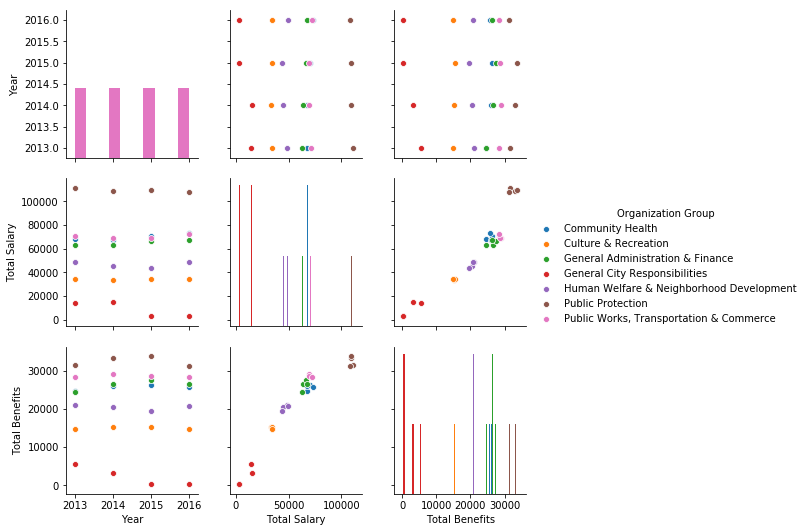

In [168]:
sns.pairplot(benefits_salary, hue='Organization Group', diag_kind='hist')

In [4]:
to_be_removed = ['Year Type','Organization Group Code','Department Code','Union Code','Job Family Code','Job Code','Employee Identifier', 'Retirement','Health/Dental', 'Other Benefits', 'Salaries', 'Overtime','Other Salaries', 'Total Salary','Total Benefits']
ds = dataset.drop(to_be_removed,axis=1)
ds.head()

,Year,Organization Group,Department,Union,Job Family,Job,Total Compensation
0,2016,Public Protection,District Attorney,Municipal Attorneys' Association,Legal & Court,Attorney (Civil/Criminal),159436.65
1,2013,Culture & Recreation,Arts Commission,"SEIU - Miscellaneous, Local 1021","Budget, Admn & Stats Analysis",Senior Management Assistant,120054.05
2,2015,Community Health,Public Health,"SEIU - Human Services, Local 1021",Human Services,Eligibility Worker,13868.64
3,2015,Community Health,Public Health,"SEIU - Health Workers, Local 1021",Medical & Dental,Dental Aide,3718.50
4,2014,Culture & Recreation,Recreation and Park Commission,"SEIU - Miscellaneous, Local 1021",Recreation,Recreation Leader,10128.64


In [15]:
print(
    len(dataset['Job Family'].unique()),
    len(dataset['Department'].unique()),
    len(dataset['Job'].unique())
)

56 54 1139


## Dropando as observações que possuem algum dado faltando

In [16]:
ds[ds.isnull().any(axis=1)].shape

(45, 6)

In [17]:
ds.drop(ds[ds.isnull().any(axis=1)].index, inplace=True)

In [18]:
ds.head()

,Year,Organization Group,Department,Union,Job Family,Total Compensation
0,2016,Public Protection,District Attorney,Municipal Attorneys' Association,Legal & Court,159436.65
1,2013,Culture & Recreation,Arts Commission,"SEIU - Miscellaneous, Local 1021","Budget, Admn & Stats Analysis",120054.05
2,2015,Community Health,Public Health,"SEIU - Human Services, Local 1021",Human Services,13868.64
3,2015,Community Health,Public Health,"SEIU - Health Workers, Local 1021",Medical & Dental,3718.50
4,2014,Culture & Recreation,Recreation and Park Commission,"SEIU - Miscellaneous, Local 1021",Recreation,10128.64


In [19]:
extract_columns = ['Job Family','Organization Group', 'Department', 'Union']
_ds = pd.get_dummies(ds, columns=extract_columns, prefix=extract_columns)
_ds.head()

,Year,Total Compensation,Job Family_Administrative & Mgmt (Unrep),Job Family_Administrative Secretarial,Job Family_Administrative-DPW/PUC,Job Family_Administrative-Labor & Trades,Job Family_Agriculture & Horticulture,Job Family_Airport Operation,Job Family_Appraisal & Taxation,"Job Family_Budget, Admn & Stats Analysis",...,"Union_Stationary Engineers, Local 39","Union_Teamsters - Miscellaneous, Local 856","Union_Teamsters - Supervising Nurses, Local 856","Union_Teamsters, Local 853","Union_Theatrical and Stage Employees, Local 16","Union_Transport Workers - Auto Svc Workers, Local 250-A","Union_Transport Workers - Fare Inspectors, Local 250-A","Union_Transport Workers - Miscellaneous, Local 250-A","Union_Transport Workers - Transit Operators, Local 250-A","Union_Transportation Workers, Local 200"
0,2016,159436.65,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2013,120054.05,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2015,13868.64,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,3718.50,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,10128.64,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
_ds.shape

(291780, 190)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error

In [22]:
regressor = Lasso()
linear_reg = LinearRegression()

X = _ds.drop(['Total Compensation'], axis=1)
y = _ds['Total Compensation'].tolist()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.67, random_state=42)

In [23]:
regressor.fit(X_train,y_train)
linear_reg.fit(X_train,y_train)

/home/marco/Documents/ml/ml_env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
predict = regressor.predict(X_test)
linear_predict = linear_reg.predict(X_test)

print("Lasso: ", mean_squared_error(y_test,predict))
print("Linear: ", mean_squared_error(y_test,linear_predict))

Lasso:  2683246304.2227182
Linear:  8.7418739903214e+25


In [48]:
predict[:10]

array([ 97375.60296206, 185572.03610601, 184389.97669416,  85757.2426608 ,
       149355.83901391,  16229.98095358, 154060.64406891,  99173.56533184,
        44585.18471391, 120577.02466024])

In [49]:
y_test[:10]

[92791.25,
 226531.85,
 231814.37,
 78744.49,
 60258.56,
 27853.33,
 211953.49,
 121006.43,
 21048.82,
 15460.97]

In [25]:
print(regressor.score(X_test, y_test))

0.41701864361850755


In [ ]:
## Aumentando tol
reg = Lasso(alpha=0.1, fit_intercept=False, normalize=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))

# Experiments using get dummies on column 'Job'

In [30]:
drop_indices = np.random.choice(ds.index, 210000, replace=False)
_ds2 = ds.drop(drop_indices)
extract_columns = ['Job Family','Organization Group', 'Department', 'Union', 'Job']
_ds2 = pd.get_dummies(_ds2, columns=extract_columns, prefix=extract_columns)

In [31]:
_ds2.shape

(81825, 1272)

In [32]:
regressor = Lasso()
linear_reg = LinearRegression()

X = _ds2.drop(['Total Compensation'], axis=1)
y = _ds2['Total Compensation'].tolist()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [33]:
regressor = Lasso()
regressor.fit(X_train,y_train)

predict = regressor.predict(X_test)

print("Lasso: ", mean_squared_error(y_test,predict))

/home/marco/Documents/ml/ml_env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso:  2007266598.9530675


In [35]:
regressor = Lasso(fit_intercept=True)
regressor.fit(X_train,y_train)

predict = regressor.predict(X_test)

print("Lasso: ", mean_squared_error(y_test,predict))

/home/marco/Documents/ml/ml_env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso:  2007266598.9530675


In [34]:
regressor = Lasso(normalize=True)
regressor.fit(X_train,y_train)

predict = regressor.predict(X_test)

print("Lasso: ", mean_squared_error(y_test,predict))

Lasso:  2028618312.58692


In [36]:
regressor = Lasso(precompute=True)
regressor.fit(X_train,y_train)

predict = regressor.predict(X_test)

print("Lasso: ", mean_squared_error(y_test,predict))

/home/marco/Documents/ml/ml_env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso:  2007266598.953073


In [37]:
regressor = Lasso(precompute=True)
regressor.fit(X_train,y_train)

predict = regressor.predict(X_test)

print("Lasso: ", mean_squared_error(y_test,predict))

/home/marco/Documents/ml/ml_env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso:  2007266598.953073


In [ ]:
regressor = Lasso(max_iter=10)
regressor.fit(X_train,y_train)

predict = regressor.predict(X_test)

print("Lasso: ", mean_squared_error(y_test,predict))

# Final Experiments

In [7]:
## Setting up

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
drop_indices = np.random.choice(ds.index, 210000, replace=False)
_ds2 = ds.drop(drop_indices)
extract_columns = ['Job Family','Organization Group', 'Department', 'Union', 'Job']
_ds2 = pd.get_dummies(_ds2, columns=extract_columns, prefix=extract_columns)

X = _ds2.drop(['Total Compensation'], axis=1)
y = _ds2['Total Compensation'].tolist()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [9]:
## Using column jobs dummies with only 81825 rows

regressor = Lasso(alpha=0.1)
regressor.fit(X_train,y_train)

predict = regressor.predict(X_test)

print("MSE Lasso: ", mean_squared_error(y_test,predict))
print("Score Lasso:", regressor.score(X_test, y_test))

/home/marco/Documents/ml/ml_env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


MSE Lasso:  2019782844.610019
Score Lasso: 0.562683806770885


In [19]:
## Not using column 'Jobs', but using all 291825 rows

from sklearn.model_selection import GridSearchCV

_ds3 = ds.drop(['Job'], axis=1)
extract_columns = ['Job Family','Organization Group', 'Department', 'Union']
_ds3 = pd.get_dummies(_ds3, columns=extract_columns, prefix=extract_columns)

X = _ds3.drop(['Total Compensation'], axis=1)
y = _ds3['Total Compensation'].tolist()
reg = Lasso(alpha=1.0, fit_intercept=True, normalize=False,
            precompute=False, copy_X=True, max_iter=1000, tol=0.0001,
            warm_start=False, positive=False, random_state=None,
            selection='cyclic')
reg.fit(X_train, y_train)

predict = reg.predict(X_test)

print("MSE Lasso: ", mean_squared_error(y_test,predict))
print("Score Lasso:", reg.score(X_test, y_test))

/home/marco/Documents/ml/ml_env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


MSE Lasso:  2015637495.282754
Score Lasso: 0.5635813430541752


In [21]:
_ds3.shape

(291825, 191)